In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [ ]:
#pip install yellowbrick==0.9.1 scikit-learn==0.22.2

In [ ]:
#pip install --upgrade kneed

In [2]:
#p1
banknote=pd.read_csv("C:/Users/acer/Desktop/DM_HW3/BankNote.csv")
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#p1
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


اصلا داده ی نال نداریم

In [4]:
#p1
banknote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
#p1
banknote["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
#p1
banknote.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [7]:
#p1
x=banknote.drop('class',axis=1)
Y=banknote['class']

In [8]:
#p1
x_scaled = StandardScaler().fit_transform(x)

In [9]:
#p1
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df.shape

Shape before PCA:  (1372, 4)
Shape after PCA:  (1372, 2)


(1372, 2)

In [10]:
#p1
target_names = {
    0:'0',
    1:'1', 
}
 
pca_df['target'] = Y
pca_df['target'] = pca_df['target'].map(target_names)

pca_df

,PC1,PC2,target
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


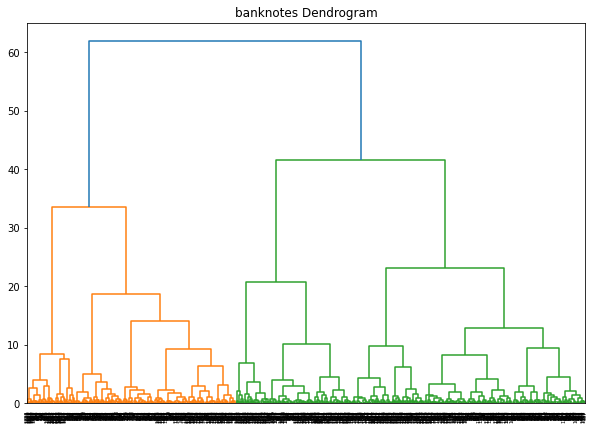

In [11]:
#p2
plt.figure(figsize=(10, 7))
plt.title("banknotes Dendrogram")

selected_data = pca_df.loc[:, ["PC1","PC2"]]
clusters = shc.linkage(selected_data, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

تعداد 3 تا کلاستر منسبتر است چون در این صورت کلاسترها بیشترین فاصله را از یکدیگر دارند. پس باید خطی روی نمودار دندوگرام کشید که سه خط را قطع کند. 

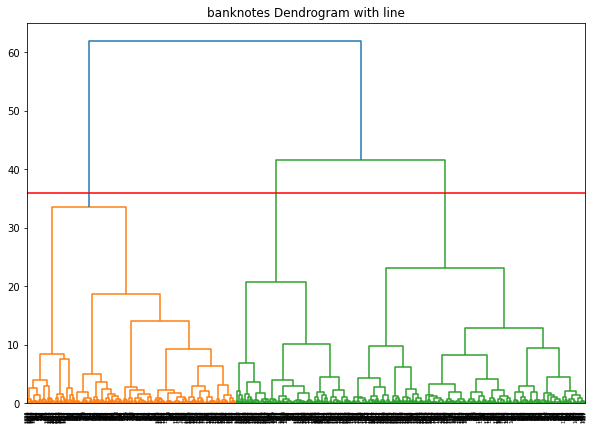

In [12]:
#p2
plt.figure(figsize=(10, 7))
plt.title("banknotes Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 36, color = 'r', linestyle = '-')

In [13]:
#p3
silhouettes=[]
possible_K_values = [i for i in range(2,21)]

for each_value in possible_K_values:
     
    model = AgglomerativeClustering(n_clusters=each_value, affinity='euclidean', linkage='ward') 
    
    model.fit_predict(pca_df)
    cluster_labels = model.labels_
    
    #silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_score_average = silhouette_score(pca_df, cluster_labels)
    print(each_value)
    print(silhouette_score_average)
    silhouettes.append(silhouette_score_average)

2
0.3342441208524878
3
0.3207077844937585
4
0.2853083282246615
5
0.2781575753626677
6
0.2953193102014802
7
0.31371118901778805
8
0.30359739593039753
9
0.3034513312916447
10
0.3195751179561938
11
0.3498755978176387
12
0.35480732780368424
13
0.37703871329735095
14
0.3928085236296345
15
0.39203151789613094
16
0.39326080423213056
17
0.39426027725350404
18
0.3971246564387123
19
0.3869199286817562
20
0.38378086753642915


k=18 is better than others. because has bigger silhoute.

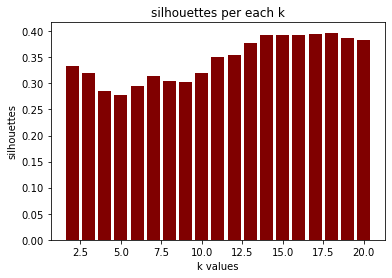

In [14]:
#p3
plt.bar(possible_K_values ,silhouettes, color ='maroon')
 
plt.xlabel("k values")
plt.ylabel("silhouettes")
plt.title("silhouettes per each k")
plt.show()

In [15]:
#bad_k_values = {}
#possible_K_values = [i for i in range(2,21)]


#for each_value in possible_K_values:

 #   model = AgglomerativeClustering(n_clusters=each_value, affinity='euclidean', linkage='ward') 
    
  #  model.fit_predict(pca_df)
   # cluster_labels = model.labels_
    
    #silhouette_score_individual = silhouette_samples(pca_df, cluster_labels)
    #for each_silhouette in silhouette_score_individual:
        
     #   if each_silhouette < 0:
            
      #      if each_value not in bad_k_values:
       #         bad_k_values[each_value] = 1
            
        #    else:
         #       bad_k_values[each_value] += 1
    
                


#for key, val in bad_k_values.items():
 #   print(f' This Many Clusters: {key} | Number of Negative Values: {val}')



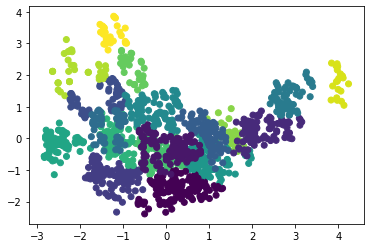

In [16]:
#p4
model = AgglomerativeClustering(n_clusters=18, affinity='euclidean', linkage='ward')
model.fit_predict(pca_df)

plt.scatter(pca_df["PC1"], pca_df["PC2"], c=model.labels_)
plt.show()

In [17]:
#p5
clusters=model.labels_
cluster1=pca_df.loc[clusters==0]
cluster2=pca_df.loc[clusters==1]
cluster3=pca_df.loc[clusters==2]
cluster4=pca_df.loc[clusters==3]
cluster5=pca_df.loc[clusters==4]
cluster6=pca_df.loc[clusters==5]
cluster7=pca_df.loc[clusters==6]
cluster8=pca_df.loc[clusters==7]
cluster9=pca_df.loc[clusters==8]
cluster10=pca_df.loc[clusters==9]
cluster11=pca_df.loc[clusters==10]
cluster12=pca_df.loc[clusters==11]
cluster13=pca_df.loc[clusters==12]
cluster14=pca_df.loc[clusters==13]
cluster15=pca_df.loc[clusters==14]
cluster16=pca_df.loc[clusters==15]
cluster17=pca_df.loc[clusters==16]
cluster18=pca_df.loc[clusters==17]
#model.cluster_centers_

In [18]:
cluster1.describe()

,PC1,PC2
count,161.000000,161.000000
mean,0.299949,-1.608931
std,0.438305,0.293189
min,-0.656089,-2.392044
25%,-0.048111,-1.805545
50%,0.240599,-1.587359
75%,0.666523,-1.389341
max,1.309501,-1.019621


In [19]:
cluster2.describe()

,PC1,PC2
count,119.000000,119.000000
mean,0.022109,-0.328795
std,0.420806,0.354581
min,-0.628829,-1.135515
25%,-0.414771,-0.582856
50%,0.078242,-0.317549
75%,0.373041,-0.076319
max,0.798385,0.430854


In [20]:
cluster3.describe()

,PC1,PC2
count,99.000000,99.000000
mean,2.207819,0.241291
std,0.386720,0.308857
min,1.567622,-0.559737
25%,1.931935,0.011919
50%,2.070647,0.264226
75%,2.443175,0.480829
max,3.150624,0.863180


In [21]:
cluster4.describe()

,PC1,PC2
count,105.000000,105.000000
mean,-1.276377,-1.220260
std,0.360683,0.335079
min,-1.880846,-2.335375
25%,-1.608267,-1.384581
50%,-1.295906,-1.185728
75%,-0.982557,-1.025017
max,-0.546967,-0.551657


In [22]:
cluster5.describe()

,PC1,PC2
count,55.000000,55.000000
mean,-1.523211,1.237699
std,0.440214,0.345640
min,-2.236640,0.645301
25%,-1.926673,0.962455
50%,-1.332158,1.231490
75%,-1.149589,1.480590
max,-0.931259,1.891068


In [23]:
cluster6.describe()

,PC1,PC2
count,91.000000,91.000000
mean,0.940231,0.141937
std,0.251956,0.398386
min,0.276446,-0.961587
25%,0.820877,-0.089047
50%,0.972654,0.150847
75%,1.095286,0.461762
max,1.443012,0.864598


In [24]:
cluster7.describe()

,PC1,PC2
count,60.000000,60.000000
mean,-1.342078,0.379316
std,0.263676,0.401076
min,-1.741071,-0.400197
25%,-1.588361,0.014625
50%,-1.309904,0.530841
75%,-1.099944,0.691793
max,-0.953925,0.894610


In [25]:
cluster8.describe()

,PC1,PC2
count,61.000000,61.000000
mean,2.832006,1.279278
std,0.261445,0.365365
min,2.415236,0.726932
25%,2.619890,0.968304
50%,2.777816,1.302546
75%,3.014382,1.589153
max,3.404110,2.092318


In [26]:
cluster9.describe()

,PC1,PC2
count,91.000000,91.000000
mean,-0.237204,0.858274
std,0.363818,0.344183
min,-0.956877,0.187467
25%,-0.571333,0.569843
50%,-0.209853,0.811500
75%,0.105466,1.148346
max,0.311356,1.514500


In [27]:
cluster10.describe()

,PC1,PC2
count,101.000000,101.000000
mean,1.000333,-0.698208
std,0.365938,0.360070
min,0.494057,-1.411878
25%,0.767664,-0.988513
50%,0.892710,-0.727912
75%,1.208739,-0.437706
max,1.975976,0.106768


In [28]:
cluster11.describe()

,PC1,PC2
count,78.000000,78.000000
mean,-2.474655,-0.167474
std,0.254014,0.282840
min,-2.838139,-1.150800
25%,-2.670760,-0.292943
50%,-2.512391,-0.137281
75%,-2.342705,-0.002043
max,-1.761929,0.483136


In [29]:
cluster12.describe()

,PC1,PC2
count,98.000000,98.000000
mean,-1.168907,-0.054381
std,0.205507,0.398436
min,-1.540346,-0.862663
25%,-1.324686,-0.352386
50%,-1.198531,-0.072884
75%,-1.008077,0.196545
max,-0.685350,0.796443


In [30]:
cluster13.describe()

,PC1,PC2
count,92.000000,92.000000
mean,-0.135142,-0.507410
std,0.308631,0.347981
min,-0.703726,-1.155735
25%,-0.377125,-0.812033
50%,-0.184635,-0.531552
75%,0.169941,-0.245182
max,0.496426,0.246522


In [31]:
cluster14.describe()

,PC1,PC2
count,33.000000,33.000000
mean,-0.773683,2.193603
std,0.193034,0.371627
min,-1.061791,1.529528
25%,-0.957891,1.897430
50%,-0.803104,2.266552
75%,-0.585412,2.492632
max,-0.491589,2.777696


In [32]:
cluster15.describe()

,PC1,PC2
count,45.000000,45.000000
mean,1.478588,0.087870
std,0.201284,0.283727
min,0.952957,-0.414501
25%,1.376667,-0.036372
50%,1.468774,0.039979
75%,1.599108,0.166776
max,1.893860,0.937643


In [33]:
cluster16.describe()

,PC1,PC2
count,36.000000,36.000000
mean,-2.092816,2.151351
std,0.402676,0.412299
min,-2.642597,1.346200
25%,-2.361128,1.845188
50%,-2.233050,2.115590
75%,-1.752643,2.320601
max,-1.406001,3.122084


In [34]:
cluster17.describe()

,PC1,PC2
count,20.000000,20.000000
mean,4.003165,1.759395
std,0.099002,0.425855
min,3.831818,1.043886
25%,3.961697,1.438766
50%,3.982527,1.802624
75%,4.063880,2.067219
max,4.237798,2.378629


In [35]:
cluster18.describe()

,PC1,PC2
count,27.000000,27.000000
mean,-1.283532,3.301113
std,0.194761,0.288468
min,-1.541089,2.790905
25%,-1.443323,3.042166
50%,-1.352482,3.290184
75%,-1.160126,3.497417
max,-0.922524,3.859602


بعد از کلاستر کردن اختلاف بین مینیمم و ماکزیمم در هر خوشه نسبت به این اختلاف در دیتافریم اولیه کاهش داشته. همچنین اختلاف چارک اول وسوم نیز در هر کلاستر نسبت به قبل کاهش داشته. از طرف دیگر انحراف معیار هر کلاستر نسبت به دیتافریم اولیه کاهش داشته.چون میدانیم بعد از کلاستر کردن نقاط موجود در هر کلاستر فاصله شان باید از یکدیگر مینیمم شود و فاصله کلاسترها از یکدیگر ماکزیمم. برای همین انحراف معیار در هر کلاستر کاهش میابد.

In [37]:
pca_df=pca_df.drop('target',axis=1)

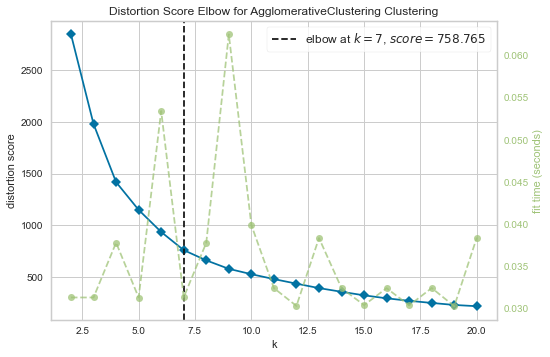

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
#p6
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,21))
visualizer.fit(pca_df)
visualizer.poof()

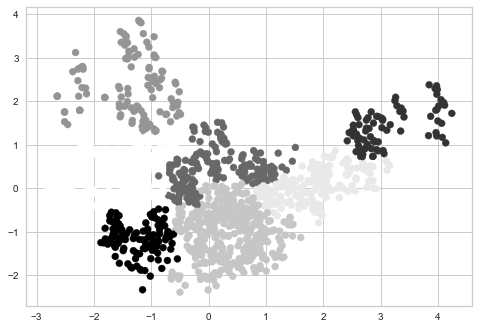

In [40]:
#p6
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit_predict(pca_df)

plt.scatter(pca_df["PC1"], pca_df["PC2"], c=model.labels_)
plt.show()

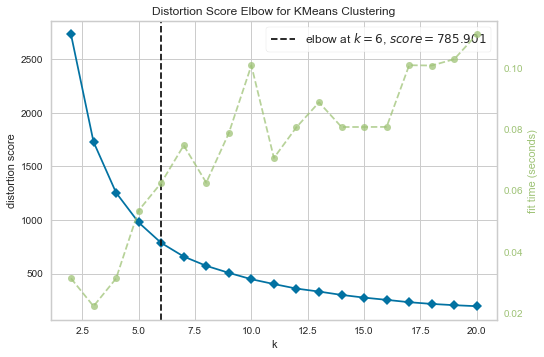

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
#p6
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))
visualizer.fit(pca_df)
visualizer.poof()

In [41]:
#p7
possible_K_values = [i for i in range(1,6)]
inertia=[]
for each_value in possible_K_values:
     
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    model.fit(pca_df)
    
    # append the inertia to our array
    inertia.append(model.inertia_)
print(inertia)

[4765.036911626293, 2730.6475329499913, 1727.9863309257992, 1254.702629414153, 976.4119183083633]


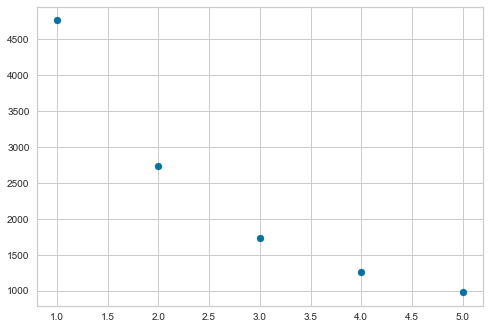

In [42]:
#p7
plt.scatter(possible_K_values, inertia)

In [ ]:
#tsne = TSNE(random_state=0)
#tsne_results = tsne.fit_transform(banknote)

#tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

#plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=Y)
#plt.show()

In [ ]:
#plt.figure(figsize = (8,4))
#plt.subplots_adjust(top = 1.5)

#for index, p in enumerate([1, 10, 25, 75]):

 #   tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
  #  tsne_results = tsne.fit_transform(x)
    
   # tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
   # plt.subplot(2,2,index+1)
   # plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=Y, s=30)
    #plt.title('Perplexity = '+ str(p))
#plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1372 samples in 0.000s...
[t-SNE] Computed neighbors for 1372 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1372
[t-SNE] Computed conditional probabilities for sample 1372 / 1372
[t-SNE] Mean sigma: 1.280001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.171009
[t-SNE] KL divergence after 300 iterations: 0.426062


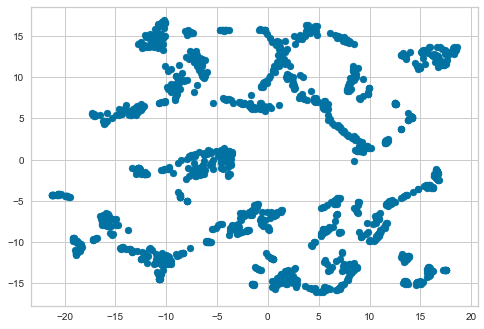

In [45]:
#p8
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_x = tsne.fit_transform(banknote)
#print(tsne_x.shape)
plt.scatter(tsne_x[:,0], tsne_x[:,1])

#tsne_x

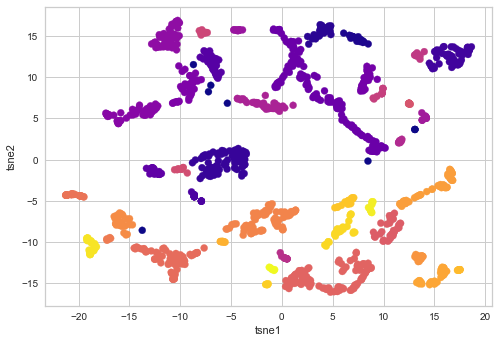

In [46]:
#p9
dbscan = DBSCAN(eps = 1, min_samples = 4).fit(tsne_x) # fitting the model
labels = dbscan.labels_ 

plt.scatter(tsne_x[:,0], tsne_x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("tsne1") # X-axis label
plt.ylabel("tsne2") # Y-axis label
plt.show()

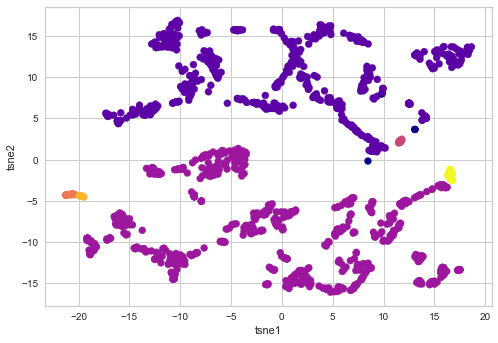

In [47]:
#p9
dbscan = DBSCAN(eps = 2, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ 

plt.scatter(tsne_x[:,0], tsne_x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("tsne1") # X-axis label
plt.ylabel("tsne2") # Y-axis label
plt.show()

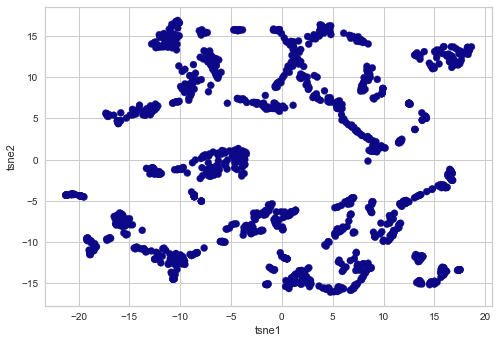

In [48]:
#p9
dbscan = DBSCAN(eps = 4, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ 

plt.scatter(tsne_x[:,0], tsne_x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("tsne1") # X-axis label
plt.ylabel("tsne2") # Y-axis label
plt.show()

هر چقدر اپسیلون افزایش یابد تعداد کلاسترها کاهش می یابد چون هر سری دایره هایی با شعاع بزرگتر را در نظر گرفته و حتی ممکن است یک دایره شامل تمام نقاط شود و تمام نقاط در یک کلاستر قرار گیرند. بنظر میرسد اپسیلون مساوی 2 مقدار بهتری است

In [49]:
#p10
neighb = NearestNeighbors(n_neighbors=4) 
nbrs=neighb.fit(tsne_x) 
distances,indices=nbrs.kneighbors(tsne_x)

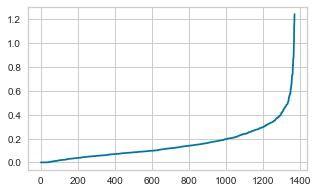

In [51]:
#p10
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

0.8155132365352634


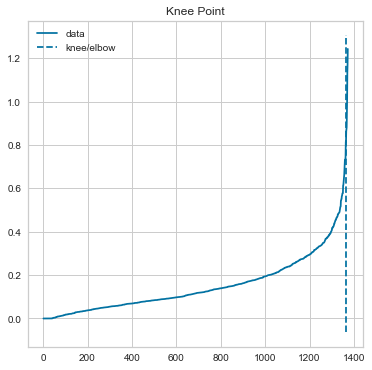

In [52]:
#p10
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

kneedle.plot_knee()
plt.show()


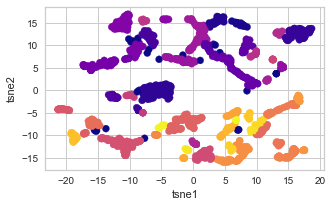

In [54]:
#p10
dbscan = DBSCAN(eps = 0.82, min_samples = 4).fit(tsne_x) # fitting the model
labels = dbscan.labels_ 

plt.scatter(tsne_x[:,0], tsne_x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("tsne1") # X-axis label
plt.ylabel("tsne2") # Y-axis label
plt.show()